In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/') # mounting gdrive


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive\

/content/gdrive/My Drive


In [ ]:
img = cv2.imread('./leaf_dataset/Blight/Corn_Blight (1).jpeg')

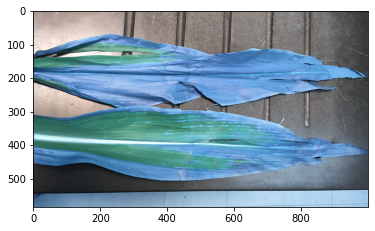

In [ ]:
plt.imshow(img) 

In [ ]:
q = cv2.resize(img, (200, 150))


In [ ]:
import os
images = []
folder = 'leaf_dataset/Blight/'                          
for filename in os.listdir(folder):
    imgg = cv2.imread(os.path.join(folder,filename))
    if imgg is not None:
        g = cv2.resize(imgg, (200, 150))
        images.append(g) 


In [ ]:
images_label = np.zeros((len(images),), dtype=int) 

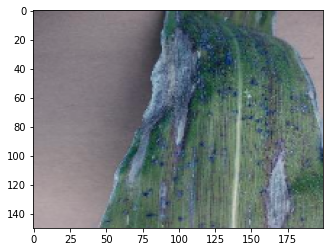

In [ ]:
plt.imshow(images[6])

In [ ]:
folder = 'leaf_dataset/Common_Rust/'                           
images1 = []
for filename in os.listdir(folder):
    imgg = cv2.imread(os.path.join(folder,filename))
    if imgg is not None:
        g = cv2.resize(imgg, (200, 150))
        images1.append(g) 

In [ ]:
images1_label = np.zeros((len(images1),), dtype=int) + 1 

In [ ]:
folder = 'leaf_dataset/Gray_Leaf_Spot/'                           
images2 = []
for filename in os.listdir(folder):
    imgg = cv2.imread(os.path.join(folder,filename))
    if imgg is not None:
        g = cv2.resize(imgg, (200, 150))
        images2.append(g) 

In [ ]:
images2_label = np.zeros((len(images2),), dtype=int) + 2 

In [ ]:
folder = 'leaf_dataset/Healthy/'                           
images3 = []
for filename in os.listdir(folder):
    imgg = cv2.imread(os.path.join(folder,filename))
    if imgg is not None:
        g = cv2.resize(imgg, (200, 150))
        images3.append(g) 

In [ ]:
images3_label = np.zeros((len(images3),), dtype=int) + 3 

In [ ]:
Train_X = np.concatenate((images,images1,images2,images3))

In [ ]:
Train_y = np.concatenate((images_label,images1_label,images2_label,images3_label))

In [ ]:
len(Train_X)

4188

In [ ]:
len(Train_y)

4188

In [ ]:
img = []
for i in range(len(Train_X)):
    img.append(Train_X[i].flatten())
img = np.array(img)/255 

In [ ]:
img = np.array(Train_X)/255 

In [ ]:
inputs = pd.DataFrame(img)

In [ ]:
inputs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89960,89961,89962,89963,89964,89965,89966,89967,89968,89969,89970,89971,89972,89973,89974,89975,89976,89977,89978,89979,89980,89981,89982,89983,89984,89985,89986,89987,89988,89989,89990,89991,89992,89993,89994,89995,89996,89997,89998,89999
0,0.247059,0.290196,0.211765,0.239216,0.286275,0.207843,0.243137,0.286275,0.207843,0.235294,0.274510,0.200000,0.215686,0.262745,0.184314,0.231373,0.282353,0.196078,0.247059,0.309804,0.219608,0.266667,0.329412,0.239216,0.274510,0.337255,0.243137,0.270588,0.341176,0.247059,0.282353,0.356863,0.258824,0.266667,0.341176,0.235294,0.235294,0.305882,0.207843,0.231373,...,0.380392,0.341176,0.403922,0.419608,0.309804,0.400000,0.419608,0.290196,0.388235,0.403922,0.282353,0.384314,0.396078,0.294118,0.392157,0.400000,0.313725,0.407843,0.411765,0.325490,0.415686,0.407843,0.356863,0.443137,0.431373,0.392157,0.482353,0.462745,0.396078,0.490196,0.458824,0.419608,0.513725,0.474510,0.450980,0.545098,0.505882,0.458824,0.552941,0.513725
1,0.015686,0.098039,0.211765,0.047059,0.137255,0.250980,0.141176,0.243137,0.345098,0.164706,0.278431,0.364706,0.333333,0.462745,0.525490,0.235294,0.372549,0.415686,0.196078,0.345098,0.364706,0.239216,0.396078,0.388235,0.203922,0.360784,0.337255,0.231373,0.384314,0.345098,0.203922,0.356863,0.305882,0.219608,0.360784,0.309804,0.227451,0.360784,0.333333,0.247059,...,0.270588,0.231373,0.333333,0.250980,0.219608,0.329412,0.239216,0.211765,0.321569,0.231373,0.203922,0.313725,0.223529,0.188235,0.298039,0.207843,0.231373,0.341176,0.250980,0.203922,0.313725,0.223529,0.247059,0.356863,0.266667,0.211765,0.321569,0.231373,0.180392,0.290196,0.200000,0.211765,0.321569,0.231373,0.176471,0.286275,0.196078,0.203922,0.313725,0.223529
2,0.078431,0.454902,0.474510,0.023529,0.427451,0.439216,0.082353,0.505882,0.509804,0.133333,0.533333,0.541176,0.082353,0.454902,0.466667,0.062745,0.443137,0.462745,0.066667,0.392157,0.396078,0.039216,0.352941,0.352941,0.031373,0.372549,0.388235,0.019608,0.364706,0.384314,0.027451,0.356863,0.360784,0.043137,0.368627,0.411765,0.023529,0.337255,0.380392,0.027451,...,0.219608,0.031373,0.313725,0.207843,0.027451,0.313725,0.196078,0.000000,0.309804,0.184314,0.023529,0.337255,0.200000,0.015686,0.337255,0.192157,0.011765,0.317647,0.196078,0.031373,0.337255,0.215686,0.027451,0.333333,0.211765,0.007843,0.313725,0.192157,0.019608,0.325490,0.203922,0.000000,0.333333,0.223529,0.011765,0.329412,0.231373,0.019608,0.309804,0.215686
3,0.658824,0.611765,0.635294,0.650980,0.603922,0.627451,0.662745,0.615686,0.639216,0.670588,0.623529,0.647059,0.650980,0.603922,0.627451,0.650980,0.603922,0.627451,0.647059,0.600000,0.623529,0.650980,0.603922,0.631373,0.666667,0.619608,0.643137,0.682353,0.635294,0.658824,0.694118,0.647059,0.670588,0.698039,0.650980,0.674510,0.690196,0.647059,0.658824,0.670588,...,0.423529,0.368627,0.352941,0.423529,0.360784,0.349020,0.423529,0.352941,0.345098,0.419608,0.349020,0.341176,0.415686,0.345098,0.337255,0.411765,0.341176,0.337255,0.407843,0.341176,0.333333,0.407843,0.345098,0.337255,0.411765,0.341176,0.333333,0.407843,0.337255,0.329412,0.403922,0.333333,0.325490,0.400000,0.329412,0.321569,0.396078,0.329412,0.321569,0.396078
4,0.525490,0.462745,0.490196,0.486275,0.423529,0.450980,0.466667,0.403922,0.431373,0.490196,0.427451,0.454902,0.478431,0.415686,0.443137,0.525490,0.462745,0.490196,0.505882,0.443137,0.470588,0.521569,0.458824,0.486275,0.513725,0.450980,0.478431,0.521569,0.458824,0.490196,0.545098,0.482353,0.509804,0.490196,0.427451,0.454902,0.498039,0.439216,0.466667,0.486275,...,0.458824,0.431373,0.411765,0.454902,0.431373,0.415686,0.458824,0.435294,0.415686,0.462745,0.439216,0.423529,0.466667,0.443137,0.427451,0.470588,0.443137,0.427451,0.470588,0.447059,0.431373,0.474510,0.450980,0.435294,0.482353,0.450980,0.435294,0.482353,0.450980,0.435294,0.482353,0.447059,0.435294,0.474510,0.443137,0.431373,0.470588,0.443137,0.423529,0.470588
...,...,...,...

In [ ]:
target = pd.DataFrame(Train_y)

In [ ]:
from sklearn.model_selection import train_test_split       # spliting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(img,Train_y,test_size=0.2) 

# Model Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
mod = clf.fit(X_train, y_train)

In [ ]:
print('Accuracy of the model : ',mod.score(X_test,y_test))

Accuracy of the model :  0.7136038186157518


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, mod.predict(X_test)) 

array([[133,  10,  53,  25],
       [ 13, 251,   5,   5],
       [ 62,   5,  35,  11],
       [ 33,   9,   9, 179]])

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

print('Precision Score : ',precision_score(y_test, mod.predict(X_test), average='macro'))
print('Recall Score: ',recall_score(y_test, mod.predict(X_test), average='macro'))
print('F1 Score : ',f1_score(y_test, mod.predict(X_test), average='macro'))

Precision Score :  0.6553420277956524
Recall Score:  0.6514659329378172
F1 Score :  0.6528210815744175


# Model Using Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rff_clf = RandomForestClassifier(n_estimators=100)
model = rff_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
print('Accuracy of the model : ',model.score(X_test,y_test))

Accuracy of the model :  0.801909307875895


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test)) 

array([[188,   7,  13,  13],
       [ 12, 251,   5,   6],
       [ 77,   2,  23,  11],
       [ 18,   2,   0, 210]])

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

print('Precision Score : ',precision_score(y_test, model.predict(X_test), average='macro'))
print('Recall Score: ',recall_score(y_test, model.predict(X_test), average='macro'))
print('F1 Score : ',f1_score(y_test, model.predict(X_test), average='macro'))

Precision Score :  0.7578197531312226
Recall Score:  0.7208301071154943
F1 Score :  0.7143919136749086


# Model Using Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
model1 = gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Accuracy of the model : ',model1.score(X_test,y_test))

Accuracy of the model :  0.7553699284009546


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model1.predict(X_test)) 

array([[160,  14,  36,  11],
       [  6, 255,   9,   4],
       [ 56,   5,  42,  10],
       [ 30,   8,  16, 176]])

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

print('Precision Score : ',precision_score(y_test, model1.predict(X_test), average='macro'))
print('Recall Score: ',recall_score(y_test, model1.predict(X_test), average='macro'))
print('F1 Score : ',f1_score(y_test, model1.predict(X_test), average='macro'))

Precision Score :  0.7056412087270243
Recall Score:  0.6978844104981524
F1 Score :  0.699848295480547


# Artificial Neural Network


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(90000,), activation='relu'),
    keras.layers.Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
105/105 [==============================] - 3s 10ms/step - loss: 9.8596 - accuracy: 0.5967
Epoch 2/20
105/105 [==============================] - 1s 11ms/step - loss: 1.9948 - accuracy: 0.7188
Epoch 3/20
105/105 [==============================] - 1s 10ms/step - loss: 2.6183 - accuracy: 0.7015
Epoch 4/20
105/105 [==============================] - 1s 11ms/step - loss: 1.8605 - accuracy: 0.7424
Epoch 5/20
105/105 [==============================] - 1s 10ms/step - loss: 1.3324 - accuracy: 0.7696
Epoch 6/20
105/105 [==============================] - 1s 10ms/step - loss: 1.2654 - accuracy: 0.7609
Epoch 7/20
105/105 [==============================] - 1s 11ms/step - loss: 1.4300 - accuracy: 0.7707
Epoch 8/20
105/105 [==============================] - 1s 11ms/step - loss: 0.9294 - accuracy: 0.7899
Epoch 9/20
105/105 [==============================] - 1s 11ms/step - loss: 0.9083 - accuracy: 0.8000
Epoch 10/20
105/105 [==============================] - 1s 11ms/step - loss: 0.5662 - accura

In [ ]:
model.evaluate(X_test,y_test)

27/27 [==============================] - 0s 8ms/step - loss: 0.8842 - accuracy: 0.8007


[0.884204626083374, 0.800715982913971]

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
105/105 [==============================] - 17s 32ms/step - loss: 0.7866 - accuracy: 0.6964
Epoch 2/20
105/105 [==============================] - 3s 28ms/step - loss: 0.3874 - accuracy: 0.8409
Epoch 3/20
105/105 [==============================] - 3s 27ms/step - loss: 0.3024 - accuracy: 0.8755
Epoch 4/20
105/105 [==============================] - 3s 27ms/step - loss: 0.2298 - accuracy: 0.9090
Epoch 5/20
105/105 [==============================] - 3s 28ms/step - loss: 0.1797 - accuracy: 0.9310
Epoch 6/20
105/105 [==============================] - 3s 28ms/step - loss: 0.1458 - accuracy: 0.9460
Epoch 7/20
105/105 [==============================] - 3s 28ms/step - loss: 0.0808 - accuracy: 0.9791
Epoch 8/20
105/105 [==============================] - 3s 28ms/step - loss: 0.0451 - accuracy: 0.9899
Epoch 9/20
105/105 [==============================] - 3s 28ms/step - loss: 0.0231 - accuracy: 0.9958
Epoch 10/20
105/105 [==============================] - 3s 28ms/step - loss: 0.0224 - accur

In [ ]:
cnn.evaluate(X_test,y_test)

27/27 [==============================] - 1s 22ms/step - loss: 0.6041 - accuracy: 0.8831


[0.6040512919425964, 0.8830549120903015]